# Binary classification based on Logistic Regression with a quadratic regularization

## import library

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import math

## load data

In [198]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train  = np.genfromtxt(fname_data_train, delimiter=',')
data_test   = np.genfromtxt(fname_data_test, delimiter=',')

num_data = data_train.shape[0]

train_x = np.zeros(num_data)
train_y = np.zeros(num_data)
train_l = np.zeros(num_data)

test_x = np.zeros(num_data)
test_y = np.zeros(num_data)
test_l = np.zeros(num_data)

for i in range(num_data):
    train_x[i]  = data_train[i,0]
    train_y[i]  = data_train[i,1]
    train_l[i]    = data_train[i,2]
    
    test_x[i]  = data_test[i,0]
    test_y[i]  = data_test[i,1]
    test_l[i]  = data_test[i,2]

## plot the data

In [199]:
print(test_l.shape[0])

500


## define feature function

In [200]:
def feature_function(x, y):
    feature = np.zeros((500, 4))
    for i in range(500):
        feature[i][0] = x[i] * x[i] * x[i] -y[i]
        feature[i][1] = x[i]
        feature[i][2] = y[i]
        feature[i][3] = x[i]*x[i] + y[i]
    return feature

## define regression function based on the feature function

In [201]:
def regression_function(theta, feature):
    value = np.matmul(theta, feature)
    return value

## define regularization function on the model parameters

In [202]:
def regularization_function(theta):
    value = 0
    for i in range(theta.shape[0]):
        value += (theta[i] * theta[i])
    return value

## define sigmoid function

In [203]:
def logistic_function(x):
    z = 1 / (1 + x)
    return z

## define loss function where $\alpha$ is a weight for the quadratic regularization term (Note that you need to add a small number (np.finfo(float).eps) inside logarithm function in order to avoid $\log( 0 )$)

In [204]:
def compute_loss_feature(theta, feature, label, alpha):
    loss=(-1)/label.shape[0]
    sum = 0
    for i in range(500):
        x = np.exp(-1  * regression_function(theta, feature[i]))
        h = logistic_function(x)
        sum += (label[i]*np.log(np.finfo(float).eps + h) + (1-label[i])*np.log(1 - h + np.finfo(float).eps))
          
    loss *= sum
    thetasum = regularization_function(theta)
    loss += (thetasum * alpha / 4)
    
    return loss

## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [205]:
def compute_gradient_feature(theta, feature, label, alpha):
    gradient = np.zeros(theta.shape[0])
    temp = np.zeros(theta.shape[0])

    for i in range(feature.shape[0]):
        x = np.exp(-1 * regression_function(theta, feature[i]))
        sigg = (logistic_function(x) - label[i])
        temp[0] += (sigg * feature[i][0]) + alpha / 2 * theta[0]
        temp[1] += (sigg * feature[i][1]) + alpha / 2 * theta[1]
        temp[2] += (sigg * feature[i][2]) + alpha / 2 * theta[2]
        temp[3] += (sigg * feature[i][3]) + alpha / 2 * theta[3]
    
    temp /= feature.shape[0]
    gradient = temp
    return gradient

## compute the accuracy

In [206]:
def compute_accuracy(theta, feature, label):
    num = 0
    for i in range(feature.shape[0]):
        x = np.exp(-1 * regression_function(theta, feature[i]))
        h = logistic_function(x)
        if h > 0.5 and label[i] == 1:
            num = num + 1
        elif h < 0.5 and label[i] == 0:
            num = num + 1
                
        accuracy = num / feature.shape[0]
                
    return accuracy

## gradient descent for the model parameters $\theta$

In [207]:
num_iteration   =  10000 
learning_rate   =  0.03
alpha           = 0.001

train_feat = feature_function(train_x, train_y)
test_feat = feature_function(test_x, test_y)

In [208]:
theta_iteration             = np.zeros((num_iteration, 4))
loss_iteration_train        = np.zeros(num_iteration)
loss_iteration_test         = np.zeros(num_iteration)
accuracy_iteration_train    = np.zeros(num_iteration)
accuracy_iteration_test     = np.zeros(num_iteration)

temptheta = np.zeros(4)

In [209]:
for i in range(num_iteration):
    gradient = compute_gradient_feature(temptheta, train_feat, train_l,alpha)
    loss_iteration_train[i] = compute_loss_feature(temptheta, train_feat, train_l,alpha)
    temptheta = temptheta - learning_rate * gradient
    theta_iteration[i] = temptheta
    accuracy_iteration_train[i] = compute_accuracy(temptheta, train_feat, train_l)
    accuracy_iteration_test[i] = compute_accuracy(temptheta, test_feat, test_l)
    loss_iteration_test[i] = compute_loss_feature(temptheta, test_feat, test_l,alpha)
        
theta_optimal = theta_iteration[9999]

## compute accuracy of the classifiers

In [210]:
accuracy_train  = compute_accuracy(theta_optimal, train_feat, train_l)
accuracy_test   = compute_accuracy(theta_optimal, test_feat, test_l)
print(accuracy_train, accuracy_test)

0.854 0.858


## plot the results

In [211]:
def plot_loss_curve(loss_iteration_train, loss_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')

    plt.plot(loss_iteration_train, '-', color = 'red', label="train")
    plt.plot(loss_iteration_test, '-', color = 'blue', label="test")

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [212]:
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('accuracy')

    plt.plot(accuracy_iteration_train, '-', color = 'red', label="train")
    plt.plot(accuracy_iteration_test, '-', color = 'blue', label="test")

    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [213]:
def plot_data(data_train, data_test):

    trainx0 = []
    trainy0 = []
    trainx1 = []
    trainy1 = []
    for i in range(500):
        if data_train[i,2] == 0:
            trainx0.append(data_train[i,0])
            trainy0.append(data_train[i,1])
        else:
            trainx1.append(data_train[i,0])
            trainy1.append(data_train[i,1])
            
    testx0 = []
    testy0 = []
    testx1 = []
    testy1 = []
    for i in range(500):
        if data_test[i,2] == 0:
            testx0.append(data_test[i,0])
            testy0.append(data_test[i,1])
        else:
            testx1.append(data_test[i,0])
            testy1.append(data_test[i,1])
    plt.figure(figsize=(16,8))
  
    plt.subplot(121)
    plt.scatter(trainx0, trainy0,s = 10, c = 'b', label="class = 0")    
    plt.scatter(trainx1, trainy1,s = 10, c = 'r', label="class = 1")
    plt.title('training data')
    plt.legend()

    plt.subplot(122)
    plt.scatter(testx0, testy0,s = 10, c = 'b', label="class = 0")    
    plt.scatter(testx1, testy1,s = 10, c = 'r', label="class = 1")
    plt.title('test data')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [214]:

def plot_model_parameter(theta_iteration):
    theta_iteration_T = theta_iteration.T
    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('model parameter')

    plt.plot(theta_iteration_T[0], '-', color = 'red', label="theta0")
    plt.plot(theta_iteration_T[1], '-', color = 'green', label = "theta1")
    plt.plot(theta_iteration_T[2], '-', color = 'blue', label = "theta2")
    plt.plot(theta_iteration_T[3], '-', color = 'yellow', label = "theta3")
    
    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

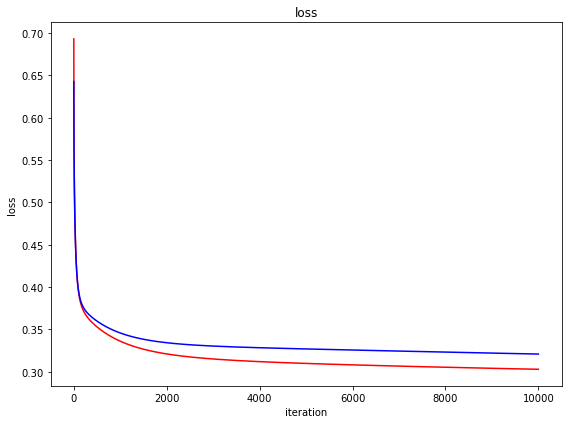

In [215]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

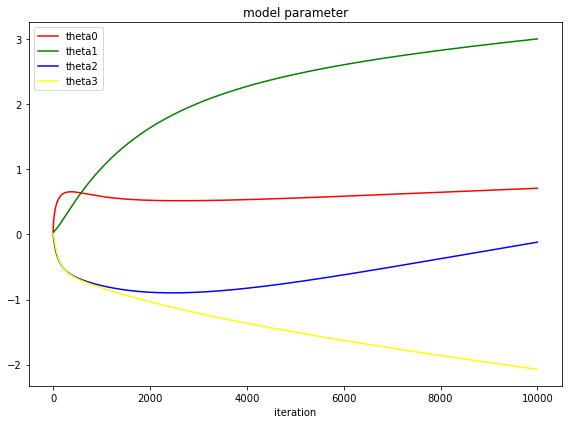

In [216]:
plot_model_parameter(theta_iteration)

In [217]:
def plot_classifier(data, theta):
        
    x0 = []
    y0 = []
    x1 = []
    y1 = []
    for i in range(500):
        if data[i,2] == 0:
            x0.append(data[i,0])
            y0.append(data[i,1])
        else:
            x1.append(data[i,0])
            y1.append(data[i,1])
            
    x = np.zeros(data.shape[0])
    y = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        x[i]  = data[i,0]
        y[i]  = data[i,1]

    x_1, y_1 = np.meshgrid(np.linspace(-1.2, 3.0, 10), np.linspace(-2.9, 2.8, 10))
    Z = (theta[0] *(x_1**3 - y_1) + theta[1] * (x_1) + theta[2] * (y_1) - theta[3]*(x_1**2 + y_1))
    
    
    xx = np.arange(-1,2.9, 0.1)  
    f = np.zeros(xx.shape[0])
    for i in range(xx.shape[0]):
        f[i] = (theta[0] * xx[i] *xx[i] *xx[i] + theta[1] * xx[i] + theta[3] * xx[i]*xx[i]) / (theta[0] - theta[2] - theta[3])
            
        
    
     # USE THIS VALUE for the size of the figure
    plt.figure(figsize=(8,8))            # Define "figure" instance
    # Physical page size in inches, (lx,ly)
    #cm = plt.cm.get_cmap('RdBu')
    cp = plt.contourf(x_1, y_1, Z,cmap = 'RdBu', levels = np.linspace(Z.reshape(-1, 1).min(), Z.reshape(-1, 1).max(), 200))

    plt.scatter(x0, y0,s = 5, c = 'b', label = "class = 0")    
    plt.scatter(x1, y1,s = 5, c = 'r', label = "class = 1")
    plt.plot(xx, f, '-', color = 'black')

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
    

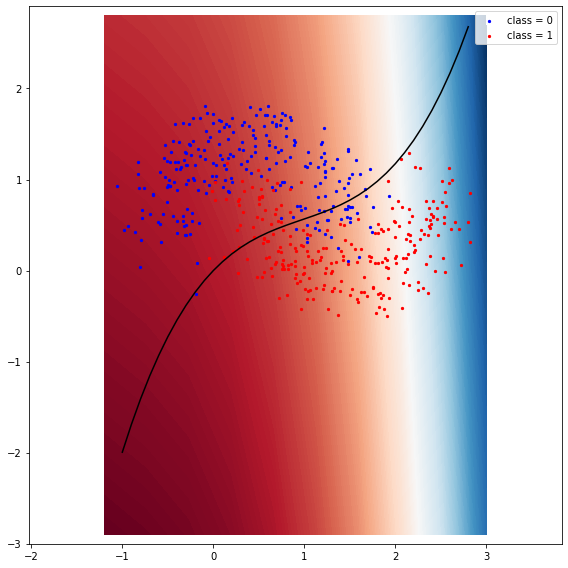

In [218]:
plot_classifier(data_train, theta_optimal)

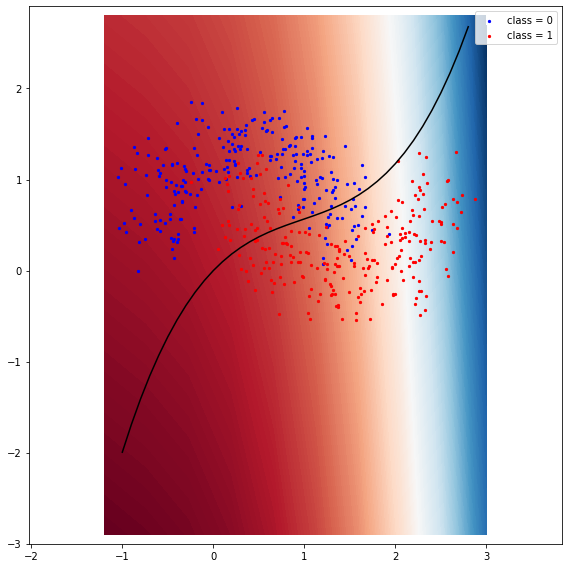

In [219]:
plot_classifier(data_test, theta_optimal)

***

# results

***

1. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

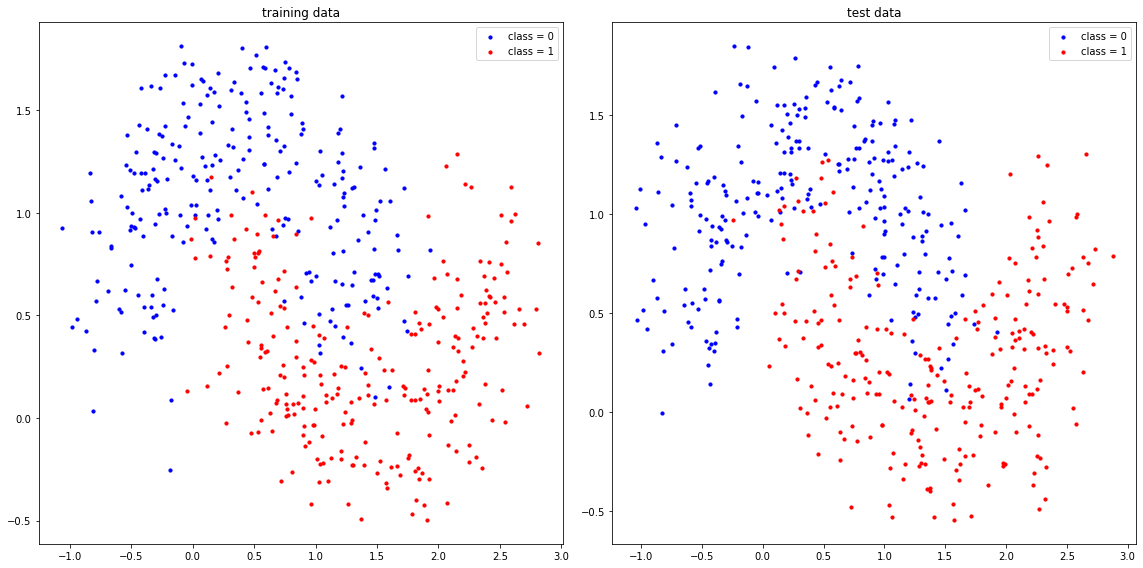

In [190]:
plot_data(data_train, data_test)

***

2. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

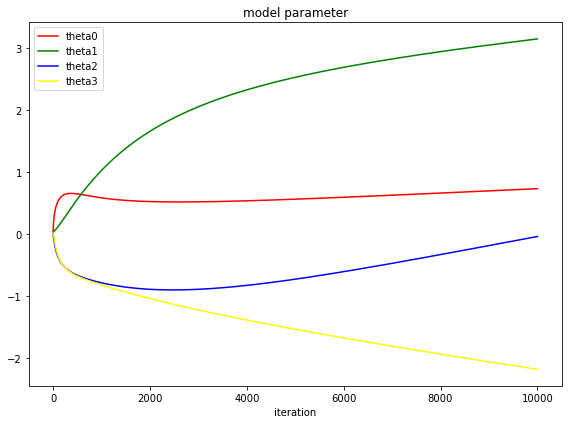

In [191]:
plot_model_parameter(theta_iteration)

***

3. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

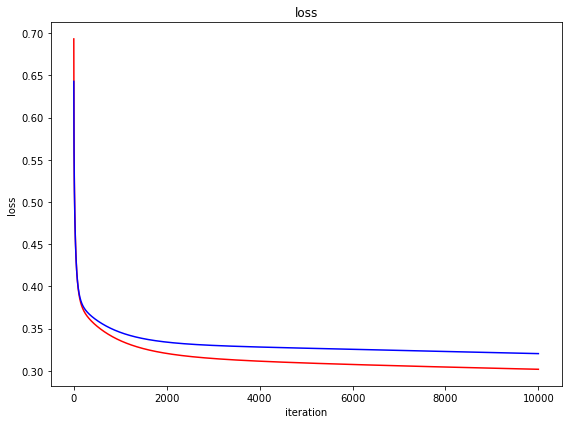

In [192]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

***

4. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

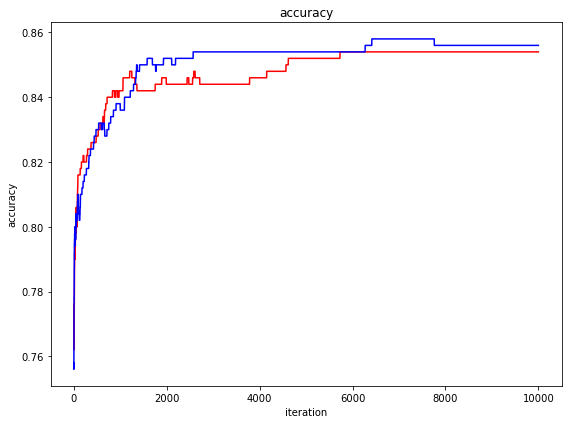

In [193]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

***

5. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

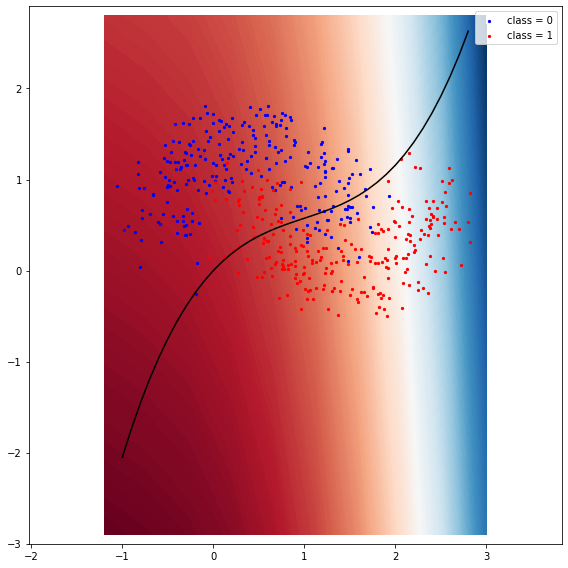

In [194]:
plot_classifier(data_train, theta_optimal)

***

6. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

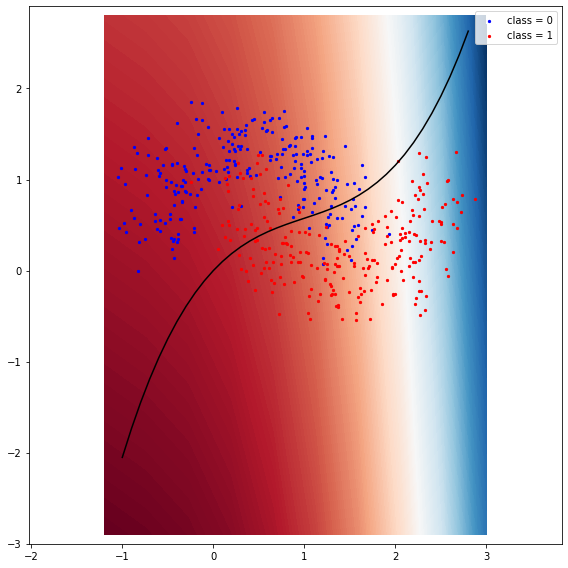

In [195]:
plot_classifier(data_test, theta_optimal)

***

7. print out the final training accuracy and the final testing accuracy in number with 5 decimal places (e.g. 0.98765)

In [220]:
print('accuract(train): {}'.format(accuracy_train))
print('accuracy(test) : {}'.format(accuracy_test))

accuract(train): 0.854
accuracy(test) : 0.858
